# Using Boston House Price Prediction
Boston is the capital city and most populous municipality of the Commonwealth of Massachusetts in the United States. The city proper covers 48 square miles (124 km2) with an estimated population of 687,584 in 2017, making it also the most populous city in the New England region. Boston is one of the oldest cities in the United States, founded on the Shawmut Peninsula in 1630 by Puritan settlers from England.

In [1]:
import pandas as pd
import numpy as np

In [13]:
house_df = pd.read_csv('boston_housing_data/housing.data',delim_whitespace= True, header = None)

In [82]:
cols = ['crimeRateByTown','Rasidential_landZone', 'Business_Acres', 'CharlesRiver_tractsBound', 'NO_concentration', 'AvgNum(Rooms)', 'HouseAGE', 'DIS_to_EmpCenter', 'RadialHighways', 'TAX', 'pupil-teacher-ratio', 'proportionOfBlacks', 'LSTAT', 'MEDV']
house_df.columns = cols
house_df.head()

,crimeRateByTown,Rasidential_landZone,Business_Acres,CharlesRiver_tractsBound,NO_concentration,AvgNum(Rooms),HouseAGE,DIS_to_EmpCenter,RadialHighways,TAX,pupil-teacher-ratio,proportionOfBlacks,LSTAT,MEDV
0,0.006,18.000,2.310,0,0.538,6.575,65.200,4.090,1,296.000,15.300,396.900,4.980,24.000
1,0.027,0.000,7.070,0,0.469,6.421,78.900,4.967,2,242.000,17.800,396.900,9.140,21.600
2,0.027,0.000,7.070,0,0.469,7.185,61.100,4.967,2,242.000,17.800,392.830,4.030,34.700
3,0.032,0.000,2.180,0,0.458,6.998,45.800,6.062,3,222.000,18.700,394.630,2.940,33.400
4,0.069,0.000,2.180,0,0.458,7.147,54.200,6.062,3,222.000,18.700,396.900,5.330,36.200


# Exploratory Data Analysis (EDA)

In [83]:
house_df.describe()

,crimeRateByTown,Rasidential_landZone,Business_Acres,CharlesRiver_tractsBound,NO_concentration,AvgNum(Rooms),HouseAGE,DIS_to_EmpCenter,RadialHighways,TAX,pupil-teacher-ratio,proportionOfBlacks,LSTAT,MEDV
count,506.000,506.000,506.000,506.000,506.000,506.000,506.000,506.000,506.000,506.000,506.000,506.000,506.000,506.000
mean,3.614,11.364,11.137,0.069,0.555,6.285,68.575,3.795,9.549,408.237,18.456,356.674,12.653,22.533
std,8.602,23.322,6.860,0.254,0.116,0.703,28.149,2.106,8.707,168.537,2.165,91.295,7.141,9.197
min,0.006,0.000,0.460,0.000,0.385,3.561,2.900,1.130,1.000,187.000,12.600,0.320,1.730,5.000
25%,0.082,0.000,5.190,0.000,0.449,5.886,45.025,2.100,4.000,279.000,17.400,375.377,6.950,17.025
50%,0.257,0.000,9.690,0.000,0.538,6.208,77.500,3.207,5.000,330.000,19.050,391.440,11.360,21.200
75%,3.677,12.500,18.100,0.000,0.624,6.623,94.075,5.188,24.000,666.000,20.200,396.225,16.955,25.000
max,88.976,100.000,27.740,1.000,0.871,8.780,100.000,12.127,24.000,711.000,22.000,396.900,37.970,50.000


In [84]:
import matplotlib.pyplot as plt
import seaborn as sns

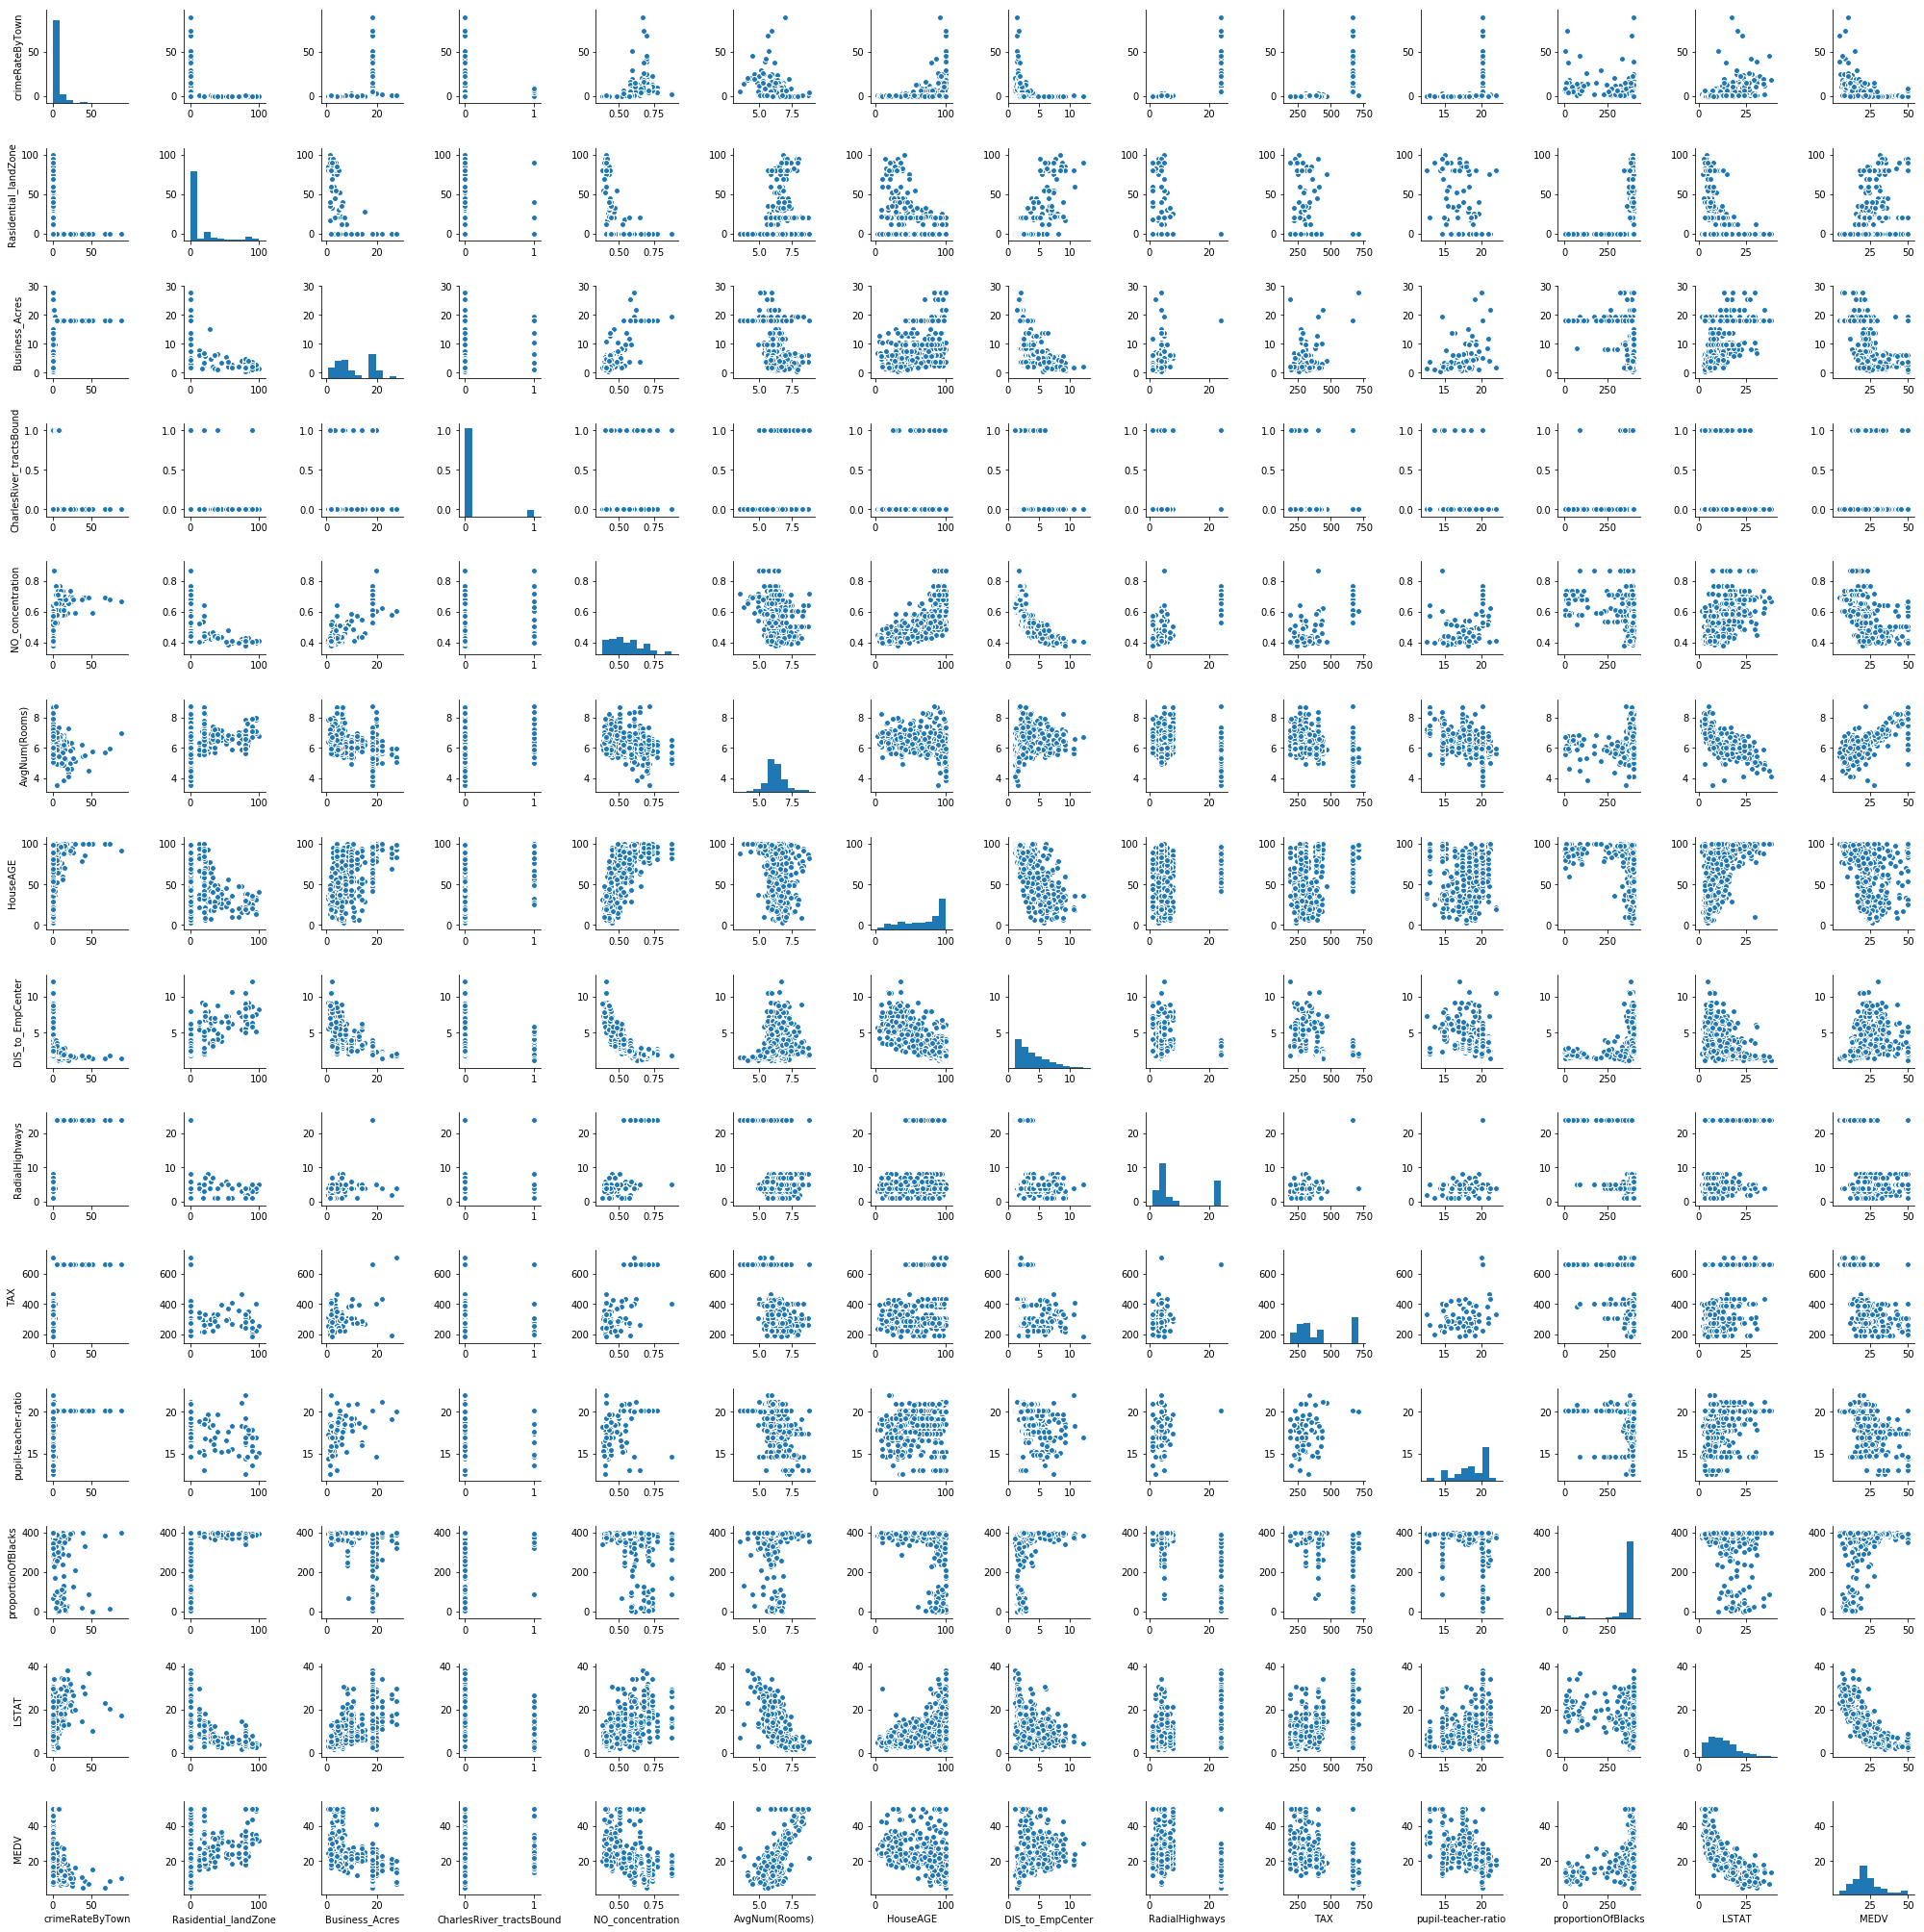

In [87]:
sns.pairplot(house_df, size=2)
plt.show()

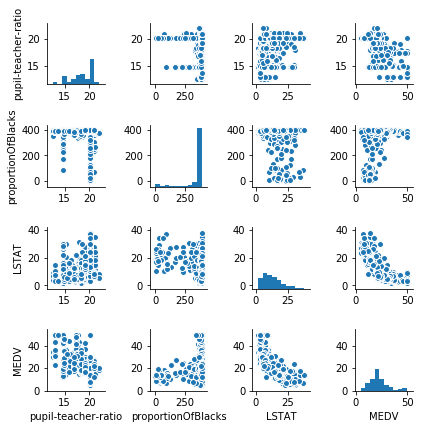

In [86]:
col = ['pupil-teacher-ratio', 'proportionOfBlacks', 'LSTAT', 'MEDV']
sns.pairplot(house_df[col], size=1.5)
plt.show()

# Correlation and Feature Selection

In [88]:
pd.options.display.float_format = '{:,.3f}'.format
house_df.corr()

,crimeRateByTown,Rasidential_landZone,Business_Acres,CharlesRiver_tractsBound,NO_concentration,AvgNum(Rooms),HouseAGE,DIS_to_EmpCenter,RadialHighways,TAX,pupil-teacher-ratio,proportionOfBlacks,LSTAT,MEDV
crimeRateByTown,1.000,-0.200,0.407,-0.056,0.421,-0.219,0.353,-0.380,0.626,0.583,0.290,-0.385,0.456,-0.388
Rasidential_landZone,-0.200,1.000,-0.534,-0.043,-0.517,0.312,-0.570,0.664,-0.312,-0.315,-0.392,0.176,-0.413,0.360
Business_Acres,0.407,-0.534,1.000,0.063,0.764,-0.392,0.645,-0.708,0.595,0.721,0.383,-0.357,0.604,-0.484
CharlesRiver_tractsBound,-0.056,-0.043,0.063,1.000,0.091,0.091,0.087,-0.099,-0.007,-0.036,-0.122,0.049,-0.054,0.175
NO_concentration,0.421,-0.517,0.764,0.091,1.000,-0.302,0.731,-0.769,0.611,0.668,0.189,-0.380,0.591,-0.427
AvgNum(Rooms),-0.219,0.312,-0.392,0.091,-0.302,1.000,-0.240,0.205,-0.210,-0.292,-0.356,0.128,-0.614,0.695
HouseAGE,0.353,-0.570,0.645,0.087,0.731,-0.240,1.000,-0.748,0.456,0.506,0.262,-0.274,0.602,-0.377
DIS_to_EmpCenter,-0.380,0.664,-0.708,-0.099,-0.769,0.205,-0.748,1.000,-0.495,-0.534,-0.232,0.292,-0.497,0.250
RadialHighways,0.626,-0.312,0.595,-0.007,0.611,-0.210,0.456,-0.495,1.000,0.910,0.465,-0.444,0.489,-0.382
TAX,0.583,-0.315,0.721,-0.036,0.668,-0.292,0.506,-0.534,0.910,1.000,0.461,-0.442,0.544,-0.469


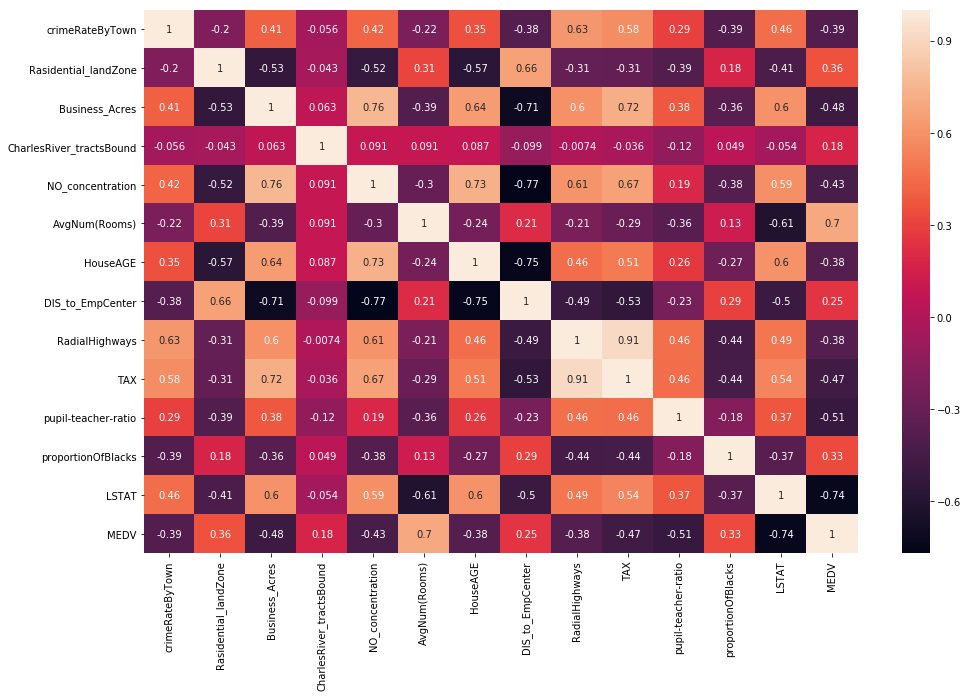

In [89]:
plt.figure(figsize=(16,10))
sns.heatmap(house_df.corr(), annot=True)
plt.show()

In [93]:
columns=['crimeRateByTown','Rasidential_landZone', 'Business_Acres', 'CharlesRiver_tractsBound', 'NO_concentration', 'MEDV']
house_df[columns].corr()

,crimeRateByTown,Rasidential_landZone,Business_Acres,CharlesRiver_tractsBound,NO_concentration,MEDV
crimeRateByTown,1.000,-0.200,0.407,-0.056,0.421,-0.388
Rasidential_landZone,-0.200,1.000,-0.534,-0.043,-0.517,0.360
Business_Acres,0.407,-0.534,1.000,0.063,0.764,-0.484
CharlesRiver_tractsBound,-0.056,-0.043,0.063,1.000,0.091,0.175
NO_concentration,0.421,-0.517,0.764,0.091,1.000,-0.427
MEDV,-0.388,0.360,-0.484,0.175,-0.427,1.000


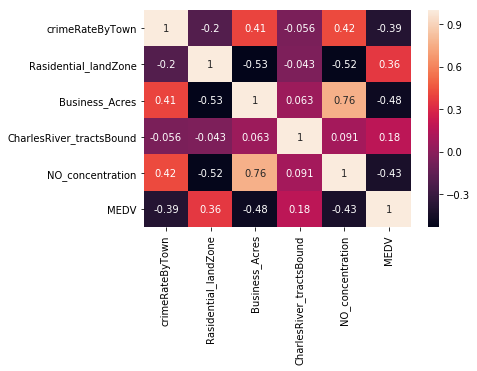

In [94]:
sns.heatmap(house_df[columns].corr(), annot=True)
plt.show()

# Linear Regression with Scikit-Learn

In [97]:
x = house_df['AvgNum(Rooms)'].values.reshape(-1,1) # We can give 506 as well then why -1?

In [99]:
y = house_df['MEDV'].values

In [100]:
from sklearn.linear_model import LinearRegression

In [101]:
model = LinearRegression()

In [102]:
model.fit(x, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [103]:
model.coef_

array([9.10210898])

In [104]:
model.intercept_

-34.670620776438554

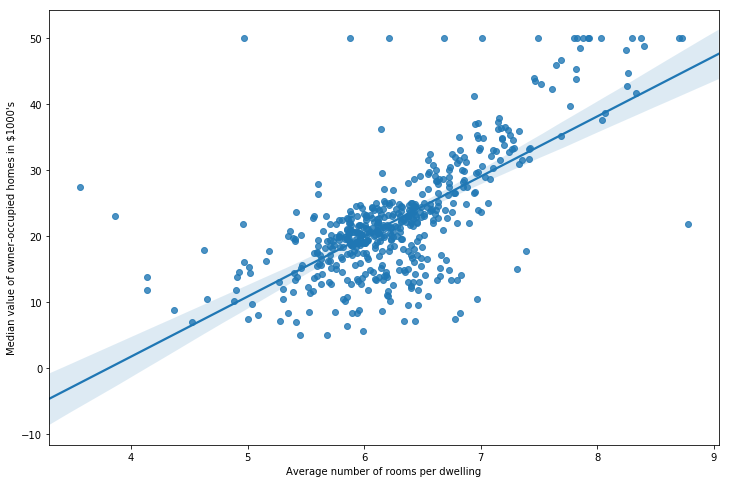

In [105]:
plt.figure(figsize=(12,8))
sns.regplot(x,y)
plt.xlabel("Average number of rooms per dwelling")
plt.ylabel("Median value of owner-occupied homes in $1000's")
plt.show()

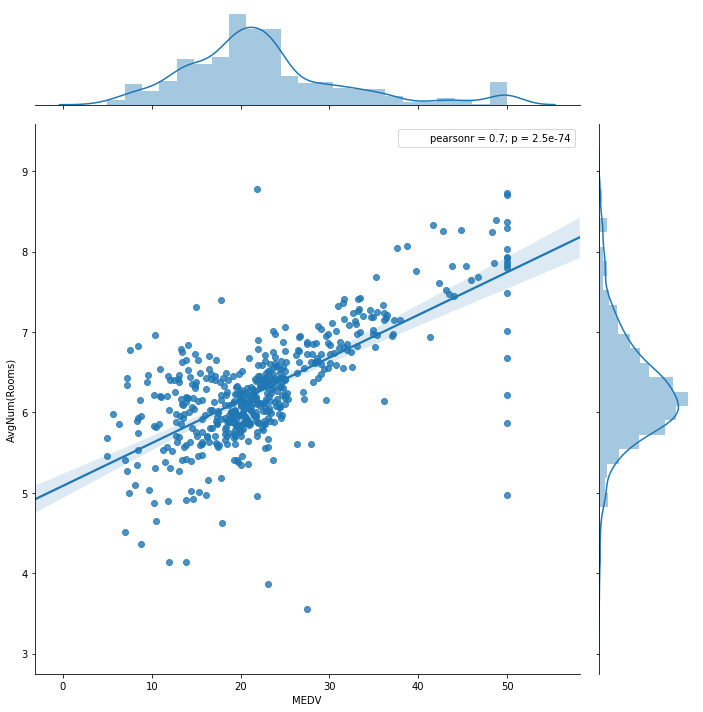

In [106]:
sns.jointplot(x='MEDV', y = 'AvgNum(Rooms)', data = house_df, kind = 'reg', size=10)
plt.show()

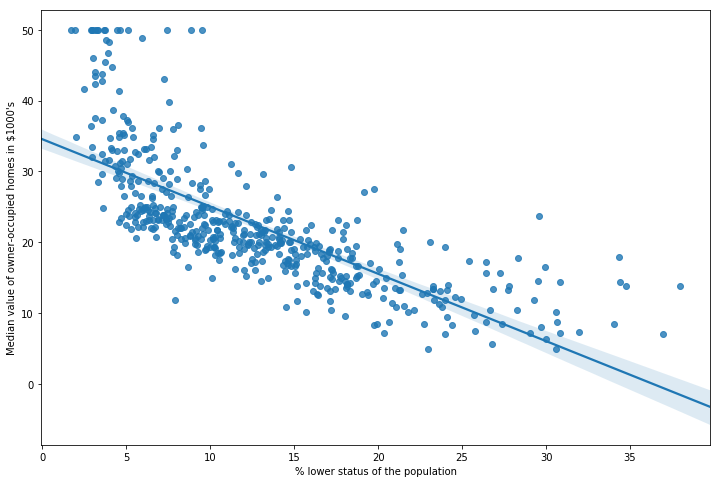

In [108]:
x = house_df['LSTAT'].values.reshape(-1,1)
y = house_df['MEDV'].values # Medium house value.
model.fit(x,y)
plt.figure(figsize=(12,8))
sns.regplot(x, y)
plt.xlabel("% lower status of the population")
plt.ylabel("Median value of owner-occupied homes in $1000's")
plt.show()

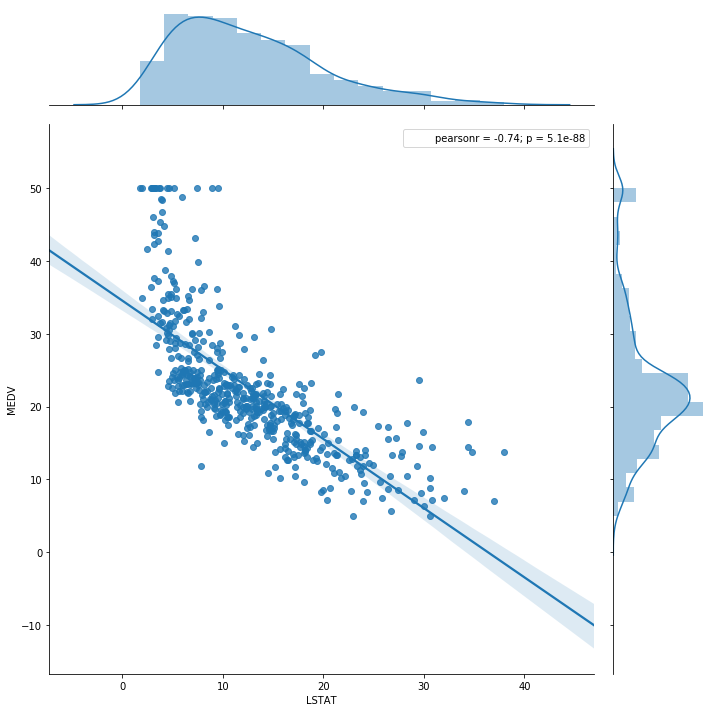

In [118]:
sns.jointplot(x='LSTAT', y = 'MEDV', data = house_df, kind = 'reg', size = 10)
plt.show()

1. CRIM      per capita crime rate by town
    2. ZN        proportion of residential land zoned for lots over 
                 25,000 sq.ft.
    3. INDUS     proportion of non-retail business acres per town
    4. CHAS      Charles River dummy variable (= 1 if tract bounds 
                 river; 0 otherwise)
    5. NOX       nitric oxides concentration (parts per 10 million)
    6. RM        average number of rooms per dwelling
    7. AGE       proportion of owner-occupied units built prior to 1940
    8. DIS       weighted distances to five Boston employment centres
    9. RAD       index of accessibility to radial highways
    10. TAX      full-value property-tax rate per $10,000
    11. PTRATIO  pupil-teacher ratio by town
    12. B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks 
                 by town
    13. LSTAT    % lower status of the population
    14. MEDV     Median value of owner-occupied homes in $1000's